In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import zscore
import os


In [3]:
#df = pd.read_csv("../data/benin-malanville.csv")
df = pd.read_csv("D:/kaimtenx/solar-challenge-week1/data/togo-dapaong_qc.csv")
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [7]:
# Convert Timestamp column to datetime if needed
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Summary statistics for all numeric columns
summary_stats = df.describe()
# Display results
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                            Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%

In [8]:


# Missing values per column
missing_values = df.isna().sum()

# Percentage of missing values
missing_percent = (missing_values / len(df)) * 100

# Columns with more than 5% missing data
columns_gt_5pct_null = missing_percent[missing_percent > 5]


print("\nMissing Values Count:\n", missing_values)
print("\nColumns with >5% Missing Values:\n", columns_gt_5pct_null)


Missing Values Count:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% Missing Values:
 Comments    100.0
dtype: float64


In [9]:
# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# ----- STEP 1: Focused columns for outlier and missing-value checks -----
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [10]:
# ----- STEP 2: Outlier Detection using Z-score -----
z_scores = df[key_columns].apply(zscore)

# Flag rows with any |Z| > 3
outliers = (np.abs(z_scores) > 3)
df['OutlierFlag'] = outliers.any(axis=1)

# Optional: Print number of outliers
print("Number of rows flagged as outliers:", df['OutlierFlag'].sum())

# ----- STEP 3: Drop or impute missing values -----
# Impute missing values with the column median for key columns
for col in key_columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Drop rows with missing timestamps or critical data if still present
df.dropna(subset=['Timestamp'], inplace=True)

# ----- STEP 4: Drop Outliers or Keep for Further Labeling -----
# Option 1: Remove outliers
df_clean = df[~df['OutlierFlag']].copy()

# Option 2: Keep all data and just tag outliers
# df_clean = df.copy()

# Drop the helper column if no longer needed
df_clean.drop(columns='OutlierFlag', inplace=True)

Number of rows flagged as outliers: 9251


In [11]:
# ----- STEP 5: Export cleaned DataFrame -----
# Ensure target directory exists
output_path = "../data/togo_clean.csv"
os.makedirs("data", exist_ok=True)

# Save the cleaned CSV
df_clean.to_csv(output_path, index=False)

print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: ../data/togo_clean.csv


In [12]:
# Load the cleaned data
df = pd.read_csv("../data/togo_clean.csv")

<Figure size 1400x600 with 0 Axes>

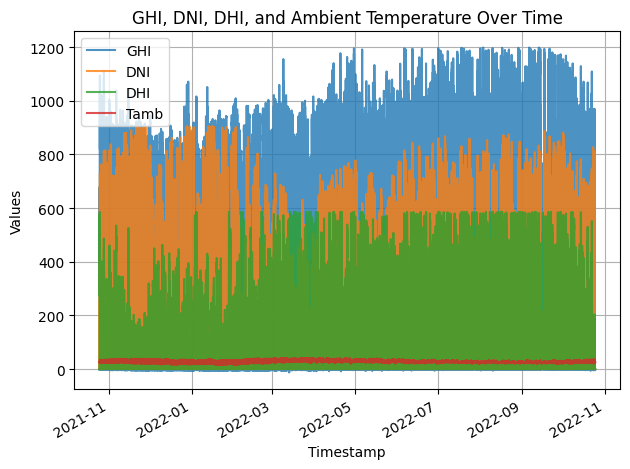

In [13]:
# Convert Timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set timestamp as index (optional but helpful)
df.set_index('Timestamp', inplace=True)

# ----- PLOT 1: Line plots of GHI, DNI, DHI, Tamb over time -----
plt.figure(figsize=(14, 6))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(alpha=0.8)
plt.title("GHI, DNI, DHI, and Ambient Temperature Over Time")
plt.ylabel("Values")
plt.xlabel("Timestamp")
plt.grid(True)
plt.tight_layout()
plt.show()

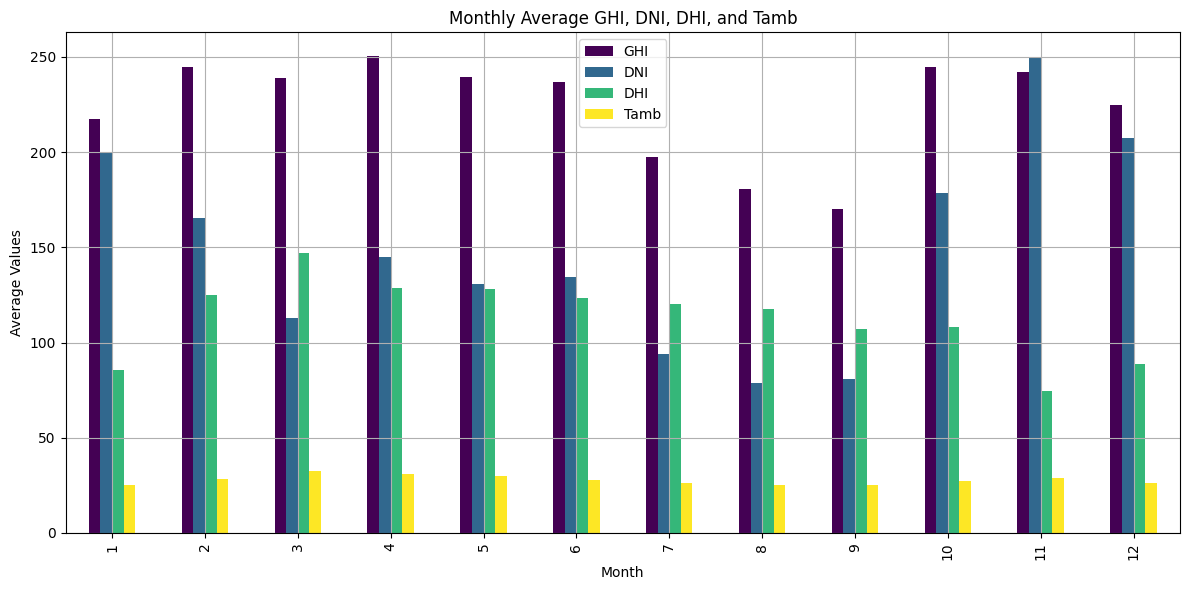

In [14]:
# Add month column
df['Month'] = df.index.month

# Monthly average plot
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

monthly_avg.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Monthly Average GHI, DNI, DHI, and Tamb")
plt.ylabel("Average Values")
plt.xlabel("Month")
plt.grid(True)
plt.tight_layout()
plt.show()

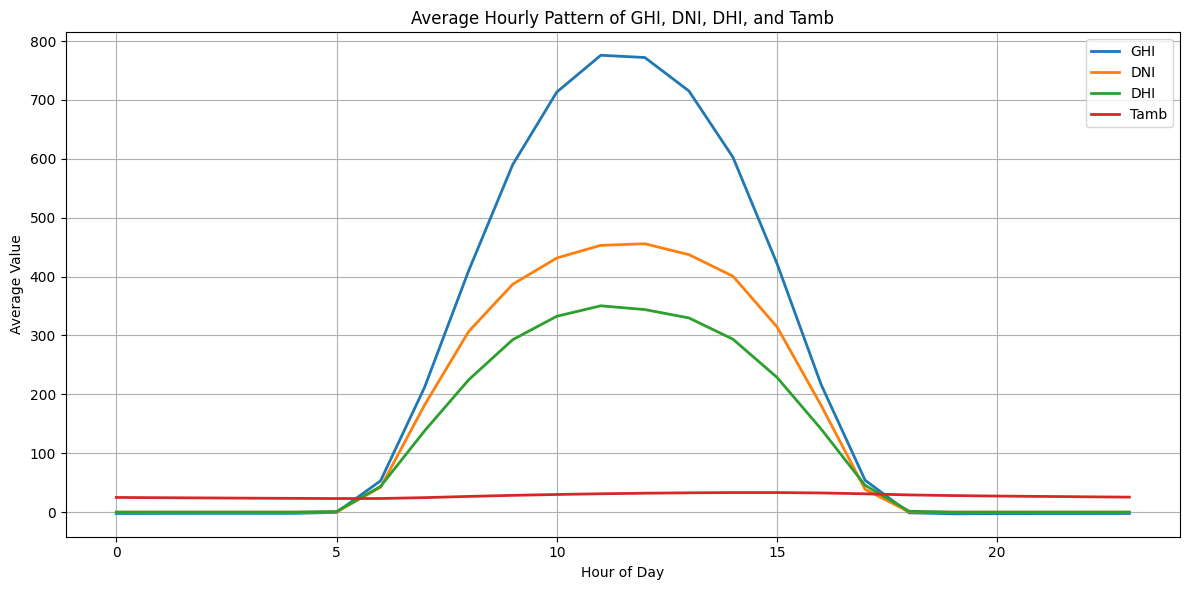

In [15]:
# Add hour column
df['Hour'] = df.index.hour

# Plot average by hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

hourly_avg.plot(figsize=(12, 6), linewidth=2)
plt.title("Average Hourly Pattern of GHI, DNI, DHI, and Tamb")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value")
plt.grid(True)
plt.tight_layout()
plt.show()

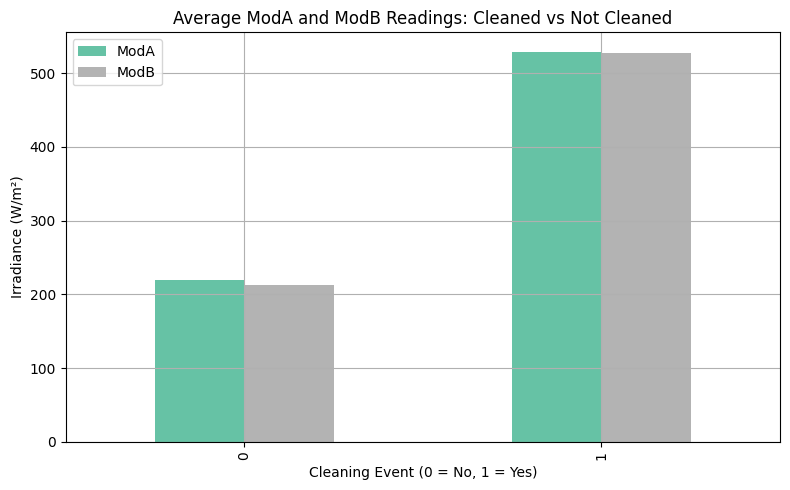

In [16]:
#	Cleaning Impact Group by Cleaning flag and plot average ModA & ModB pre/post-clean.
# Group by Cleaning flag (0 = not cleaned, 1 = cleaned)
mod_means = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Bar plot to compare ModA and ModB before and after cleaning
mod_means.plot(kind='bar', figsize=(8, 5), colormap='Set2')
plt.title("Average ModA and ModB Readings: Cleaned vs Not Cleaned")
plt.xlabel("Cleaning Event (0 = No, 1 = Yes)")
plt.ylabel("Irradiance (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()


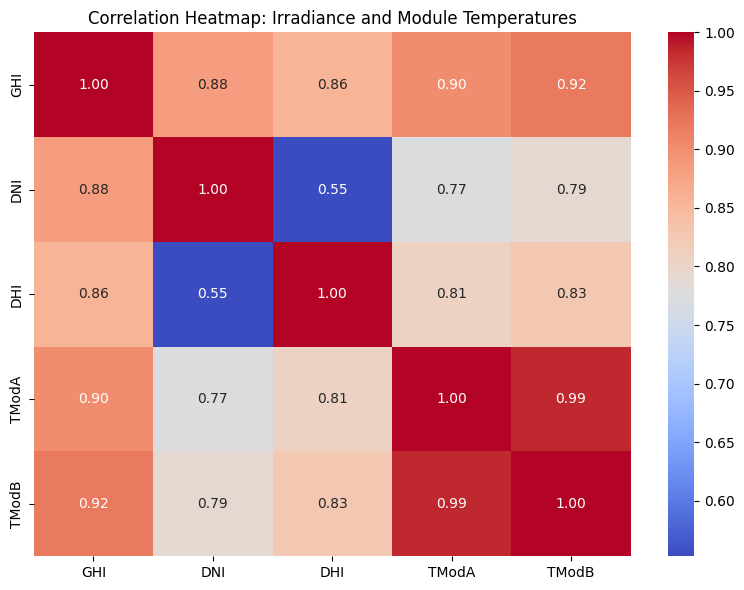

In [17]:
#Correlation & Relationship Analysis  Correlation Heatmap
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Irradiance and Module Temperatures")
plt.tight_layout()
plt.show()

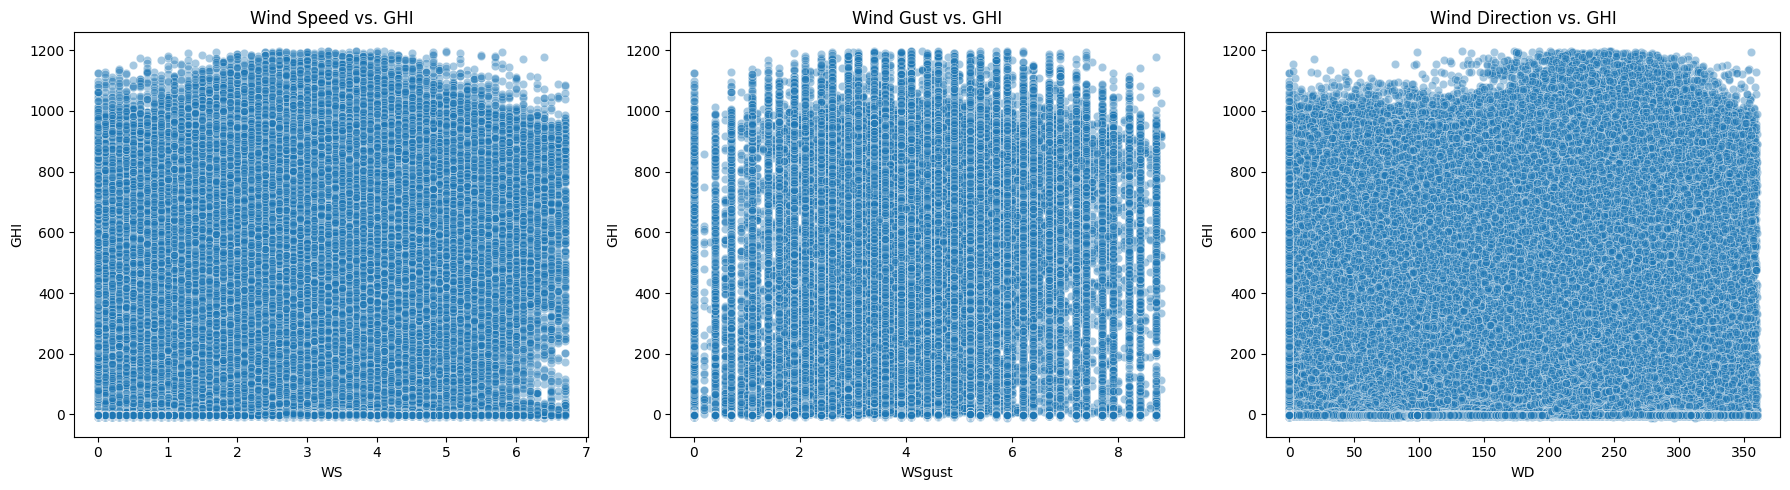

In [18]:
#Scatter Plots for Variable Relationships
# Wind Speed & Gust vs. GHI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(ax=axes[0], data=df, x='WS', y='GHI', alpha=0.4)
axes[0].set_title("Wind Speed vs. GHI")

sns.scatterplot(ax=axes[1], data=df, x='WSgust', y='GHI', alpha=0.4)
axes[1].set_title("Wind Gust vs. GHI")

sns.scatterplot(ax=axes[2], data=df, x='WD', y='GHI', alpha=0.4)
axes[2].set_title("Wind Direction vs. GHI")

plt.tight_layout()
plt.show()


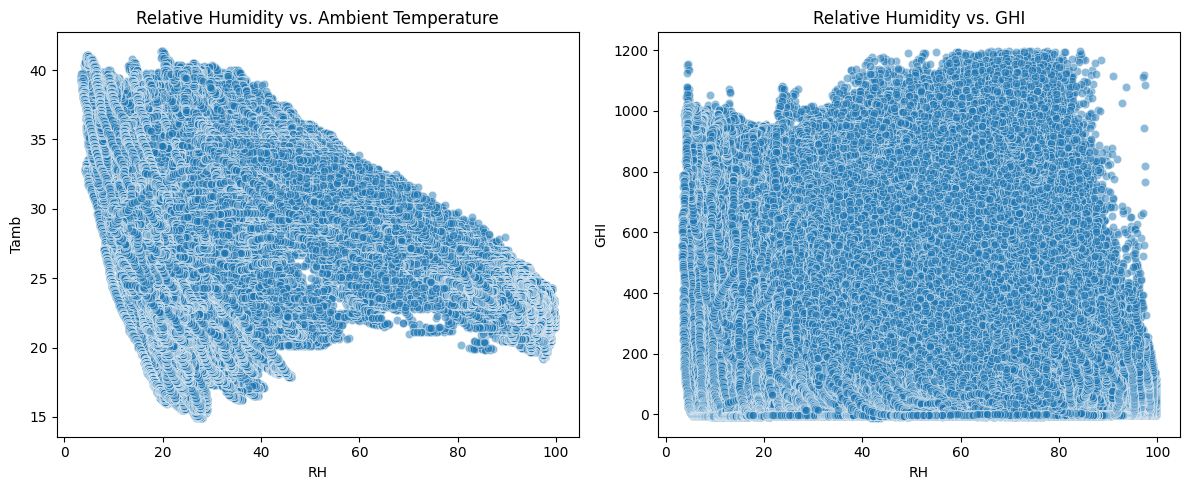

In [19]:
# RH vs Tamb and RH vs GHI
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(ax=axes[0], data=df, x='RH', y='Tamb', alpha=0.5)
axes[0].set_title("Relative Humidity vs. Ambient Temperature")

sns.scatterplot(ax=axes[1], data=df, x='RH', y='GHI', alpha=0.5)
axes[1].set_title("Relative Humidity vs. GHI")

plt.tight_layout()
plt.show()


In [ ]:
#Wind Rose (using windrose library)
from windrose import WindroseAxes
import matplotlib.pyplot as plt

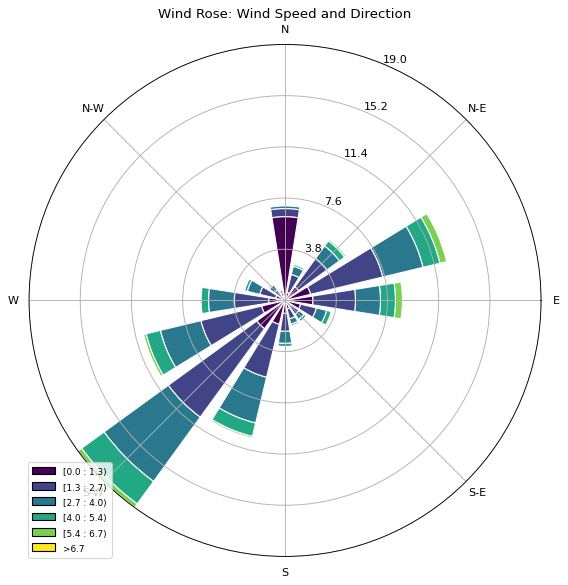

In [24]:
# Plot Wind Rose
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_title("Wind Rose: Wind Speed and Direction")
ax.set_legend()
plt.show()

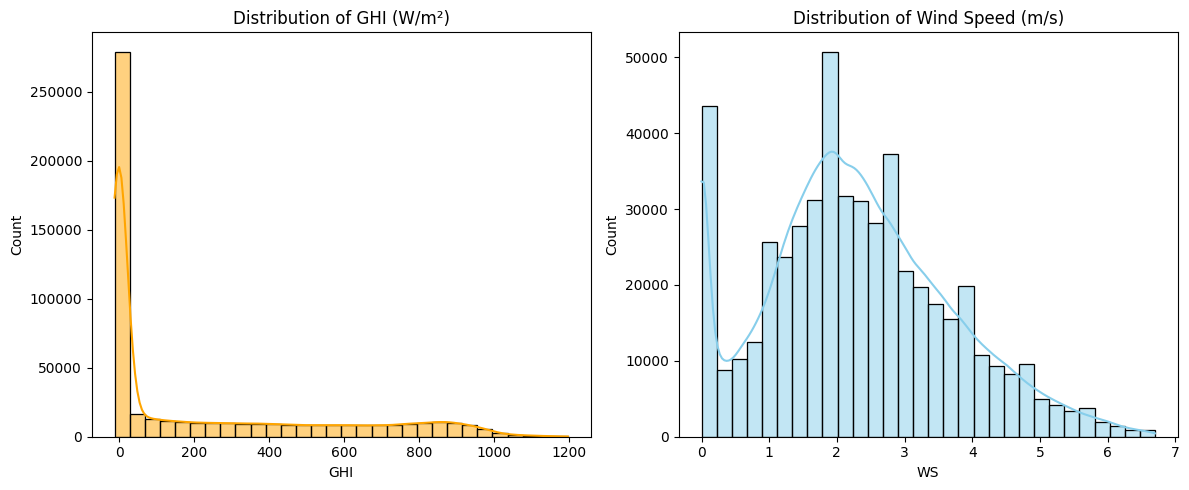

In [25]:
#Histogram of GHI and Wind Speed
# Histogram for GHI
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['GHI'], bins=30, kde=True, color='orange')
plt.title("Distribution of GHI (W/m²)")

# Histogram for WS (Wind Speed)
plt.subplot(1, 2, 2)
sns.histplot(df['WS'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Wind Speed (m/s)")

plt.tight_layout()
plt.show()

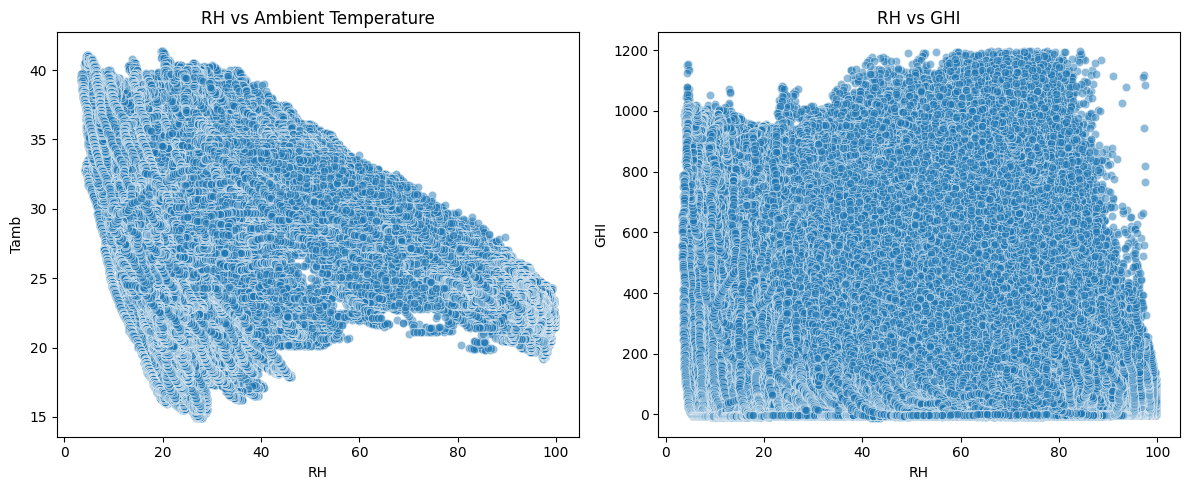

In [26]:
#Temperature & Humidity Influence
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.5)
plt.title("RH vs Ambient Temperature")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.5)
plt.title("RH vs GHI")

plt.tight_layout()
plt.show()


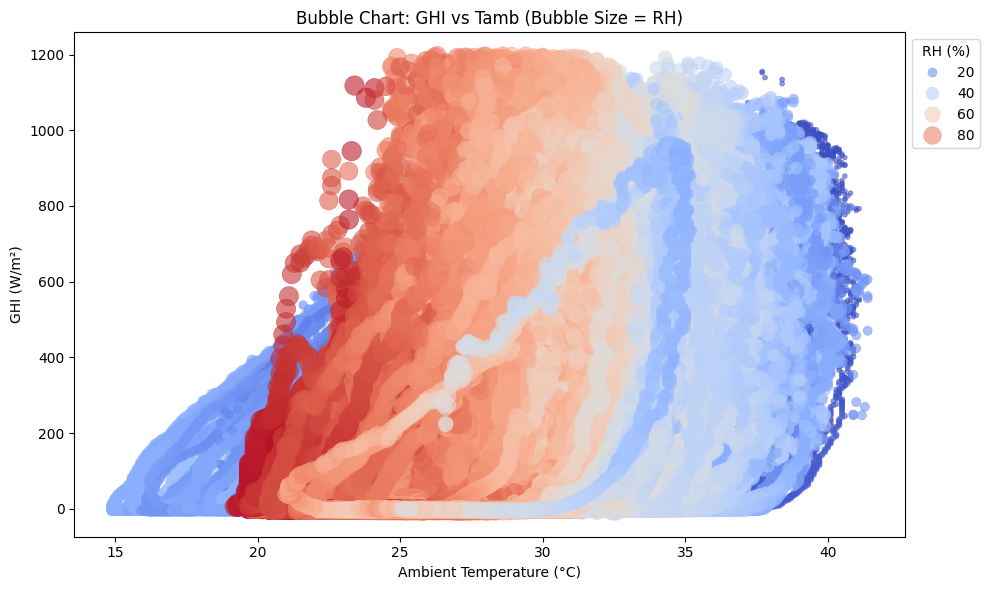

In [27]:
# Bubble Chart: GHI vs Tamb, Bubble Size = RH or BP
plt.figure(figsize=(10, 6))
# Bubble chart: RH as bubble size
sns.scatterplot(data=df, x='Tamb', y='GHI', size='RH', hue='RH',
                palette='coolwarm', alpha=0.6, edgecolor=None, sizes=(10, 200))

plt.title("Bubble Chart: GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.legend(title="RH (%)", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
